# Distributions Warmup

It's another day at the office at Big Research Co ™. You look up from your laptop and see a woman in a lab coat standing in front of your desk.

"I need some help" she says. "We lost some subjects from the trial."

She notices a curious look on your face.

"Not like that, they just ran away. We didn't lock the doors soon enough."

"Anyway, there's probably like a 70%, no maybe 80%, no, let's say 90% chance that a given subject will stick around, and I need to run the study again with 10, or 20 subjects. We need to gather enough data on them to justify the cost, so I need you to figure out what are the probabilities are that at least half of them stick around, only 1 person leaves, and that all the subjects stay."

She sees you start to form another question and cuts you off.

"Don't ask. You really don't want to know."

- What probability distribution would you use to model the scenario outlined above?
- Calculate all the requested probabilities. Use all the possible combinations of subject count and chance that a subject will stay in the study.
- Bonus: visualize the requested probabilities.

# Hints
- Use scipy.stats for this.
- A fancy list comprehension or the itertools module can help you find all the possible combinations.
- Consider storing the results of your calculations in a data frame.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import binom
import seaborn as sns

### 20 Participants

At least half stick around ( 10 people stay or 11 people stay or 12 people stay or 13 people stay or 14 people stay or 15 people stay or 16 people stay or 17 people stay or 18 people stay or 19 people stay or 20 people stay)

In [35]:
stats.binom(20, .90).sf(9)

0.9999992911393668

Only 1 Person Leaves (19 people stay)

In [27]:
stats.binom(20, .90).pmf(19)

0.27017034353459823

Nobody Leaves (20 people stay)

In [24]:
stats.binom(20, .90).pmf(20)

0.12157665459056931

### 10 Participants
At least half stick around (5 people stay or 6 people stay or 7 people stay or 8 people stay or 9 people 10 people stay)

In [37]:
stats.binom(10, .90).sf(4)

0.9998530974

Only 1 Person Leaves (9 people stay)

In [39]:
stats.binom(10, .90).pmf(9)

0.38742048900000037

Nobody Leaves (10 people stay)

In [40]:
stats.binom(10, .90).pmf(10)

0.34867844010000004

### Visualizing the Distributions (20 People)

<BarContainer object of 21 artists>

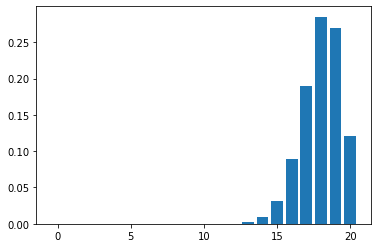

In [55]:
y = []
for i in range(21):
    y.append(stats.binom(20, .90).pmf(i))
x = list(range(21))
plt.bar(x, y)

### Visualizing the Distribution (10 People)

<BarContainer object of 11 artists>

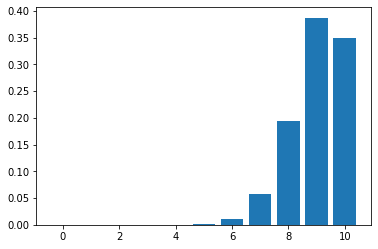

In [56]:
y = []
for i in range(11):
    y.append(stats.binom(10, .90).pmf(i))
x = list(range(11))
plt.bar(x, y)

# Matplotlib Warmup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

`df` contains (fake) data on students time at codeup:

- `ml_coffee`: coffee consumption in milliliters
- `syntax_errors`: number of syntax errors
- `p_days_absent`: percentage of days absent

Create a scatter plot of syntax_errors and ml_coffee. Make sure to give your visual an appropriate title and labels.

Create a scatter plot of p_days_absent and ml_coffee. Make sure to give your visual an appropriate title and labels.

Perform any other customizations you think will help to the plots you have created

In [10]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


In [17]:
df['oz_coffee'] = df.ml_coffee / 29.5735
df.head()

,ml_coffee,syntax_errors,p_days_absent,oz_coffee
0,16225,5.071306e+10,0.038821,548.633067
1,18230,5.199823e+10,0.022748,616.430250
2,15877,5.072630e+10,0.036627,536.865775
3,8263,4.907919e+10,0.041293,279.405549
4,13935,5.145114e+10,0.081544,471.198877


In [35]:
df['syntax_errors_billions'] = df.syntax_errors / 1_000_000_000
df['cups_coffee'] = df.oz_coffee / 8

[Text(0, 0.5, '# of Syntax Errors (in billions)'),
 Text(0.5, 0, 'Coffee Consumption (cups)'),
 Text(0.5, 1.0, 'Students That Drink More Coffee Tend to Make More Errors')]

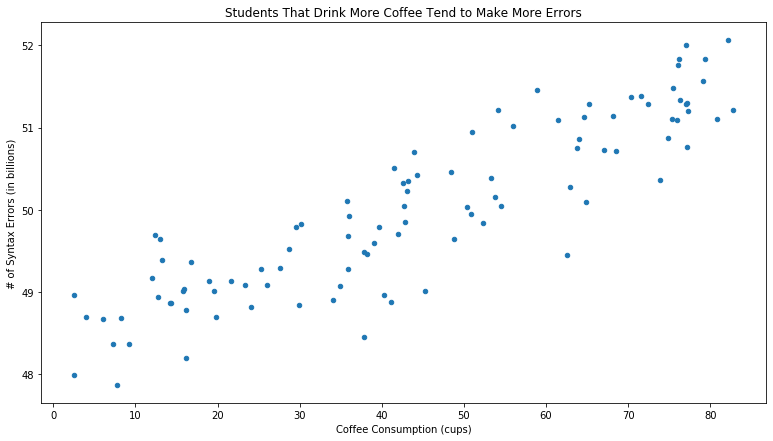

In [36]:
ax = df.plot.scatter(y='syntax_errors_billions', x='cups_coffee', figsize=(13,7))
ax.set(
    xlabel= 'Coffee Consumption (cups)',
    ylabel= '# of Syntax Errors (in billions)',
    title= "Students That Drink More Coffee Tend to Make More Errors"
)

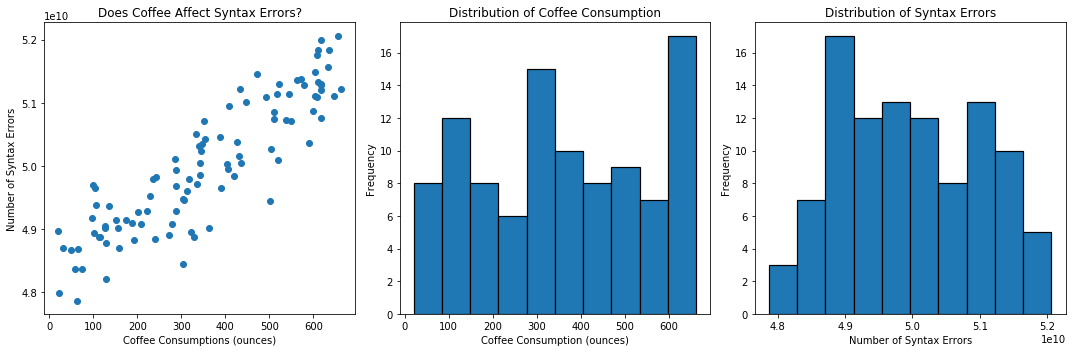

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.oz_coffee, df.syntax_errors)
plt.title('Does Coffee Affect Syntax Errors?')
plt.ylabel('Number of Syntax Errors')
plt.xlabel('Coffee Consumptions (ounces)')

plt.subplot(1,3,2)
plt.hist(df.oz_coffee, edgecolor='black', linewidth=1.2)
plt.title('Distribution of Coffee Consumption')
plt.xlabel('Coffee Consumption (ounces)')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(df.syntax_errors, edgecolor='black', linewidth=1.2)
plt.title('Distribution of Syntax Errors')
plt.xlabel('Number of Syntax Errors')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

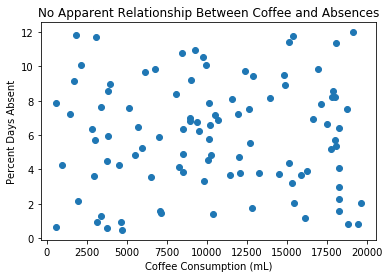

In [43]:
plt.scatter(df.ml_coffee, df.p_days_absent * 100)
plt.title('No Apparent Relationship Between Coffee and Absences')
plt.xlabel('Coffee Consumption (mL)')
plt.ylabel('Percent Days Absent')
plt.show()

[Text(0, 0.5, '% Days Absent'),
 Text(0.5, 0, 'Coffee Consumption (mL)'),
 Text(0.5, 1.0, 'Coffee Consumption doesnt not correlate with absences')]

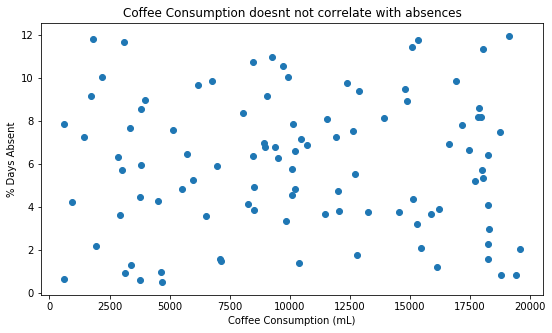

In [42]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(df.ml_coffee, df.p_days_absent * 100)
ax.set(
    xlabel = 'Coffee Consumption (mL)',
    ylabel = '% Days Absent',
    title = 'Coffee Consumption doesnt not correlate with absences'
)

In [49]:
def format_y_tick(tickvalue, position):
    return '{:.0%}'.format(tickvalue)

def format_x_tick(tickvalue, position):
    return '{:,}'.format(int(tickvalue))

format_y_tick(.01, None)
format_x_tick(1205024, None)

'1,205,024'

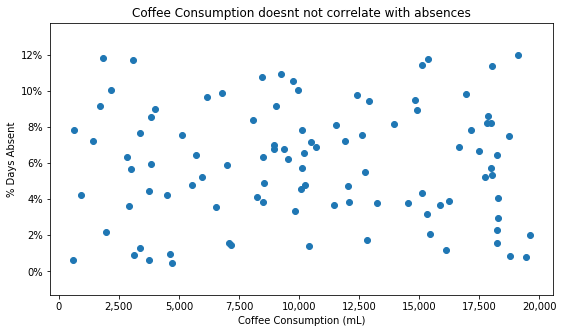

In [50]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(df.ml_coffee, df.p_days_absent)
ax.set(
    xlabel = 'Coffee Consumption (mL)',
    ylabel = '% Days Absent',
    title = 'Coffee Consumption doesnt not correlate with absences'
)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_y_tick))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_x_tick))

How to handle number presentation on x and y axis
- domain-based scaling: e.g. divide by 1,000,000, use conversion factor (mL to cups)
- A custom function + `mpl.ticker.FuncFormatter()
- `ax.get_xticks()` + `ax.set_xticks()`